![](enunciado.png)


# 1.

In [146]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD


In [62]:

df = pd.read_csv('weight-height.csv')

print(df.head(5))


  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [63]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})



C:\Users\knd\AppData\Local\Temp\ipykernel_10056\226895169.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


In [64]:
df.head(5)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [65]:
df.shape

(10000, 3)

In [66]:
A = df.values.tolist()
# A = [[3,7],[5,2]]
A[:5]


[[1.0, 73.847017017515, 241.893563180437],
 [1.0, 68.7819040458903, 162.3104725213],
 [1.0, 74.1101053917849, 212.7408555565],
 [1.0, 71.7309784033377, 220.042470303077],
 [1.0, 69.8817958611153, 206.349800623871]]

In [67]:
# Como a nossa matriz nao e nem simetrica e nem quadrada, vamos fazer a multiplicar A pela transposta de A

In [68]:
def transpose_matrix(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]


In [69]:
transpose_matrix(A)

[[1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,

In [70]:
C = np.dot(A, transpose_matrix(A))


In [71]:
# como podemos ver a trasposta a resultou em uma matriz quadrada e simetrica
C.shape

(10000, 10000)

In [72]:
C[:][6] == C[6][:]

array([ True,  True,  True, ...,  True,  True,  True])

In [73]:
# Calcular os autovalores e autovetores da matriz C
eigenvaluesC, eigenvectorsC = np.linalg.eig(C)


In [74]:
eigenvaluesC[0]

(314346920.2982065+0j)

In [77]:
eigenvectorsC[0][0]

(0.014213620343468798+0j)

In [78]:
len(eigenvaluesC), len(eigenvectorsC)


(10000, 10000)

In [79]:
#calculando os valores singulares

singular_valuesC = np.sqrt(np.abs(eigenvaluesC))
len(singular_valuesC)
singular_valuesC[0]


17729.83136688577

In [80]:
def get_sorted_indexes(lst):
    sorted_indexes = sorted(range(len(lst)), key=lambda i: lst[i], reverse=True)
    return sorted_indexes


In [81]:
# Ordenar os valores singulares em ordem decrescente
sorted_indices = get_sorted_indexes(singular_valuesC)
sorted_indices


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 11,
 12,
 9,
 10,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 27,
 28,
 25,
 26,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 54,
 55,
 60,
 61,
 52,
 53,
 64,
 65,
 66,
 58,
 59,
 69,
 70,
 56,
 57,
 73,
 74,
 62,
 63,
 67,
 68,
 75,
 76,
 79,
 80,
 81,
 82,
 83,
 84,
 87,
 88,
 85,
 86,
 93,
 94,
 71,
 72,
 99,
 100,
 77,
 78,
 91,
 92,
 89,
 90,
 149,
 150,
 151,
 152,
 117,
 118,
 111,
 112,
 129,
 130,
 97,
 98,
 155,
 156,
 139,
 140,
 135,
 136,
 137,
 138,
 113,
 114,
 131,
 132,
 159,
 160,
 141,
 142,
 183,
 184,
 157,
 158,
 125,
 126,
 133,
 134,
 95,
 96,
 109,
 110,
 101,
 102,
 121,
 122,
 161,
 162,
 119,
 120,
 193,
 194,
 147,
 148,
 103,
 104,
 105,
 106,
 211,
 173,
 174,
 209,
 210,
 179,
 180,
 115,
 116,
 107,
 108,
 123,
 124,
 177,
 178,
 205,
 206,
 153,
 154,
 143,
 144,
 197,
 198,
 230,
 231,
 207,
 208,
 181,
 182,
 127,
 128,
 250,


In [82]:
sorted_singular_values = singular_valuesC[sorted_indices]

# Reordenar os eigenvetores na mesma ordem
sorted_eigenvectorsC = eigenvectorsC[:, sorted_indices]

In [83]:
# Fazendo a matriz na diagonal
sigma_sigma = np.diag(sorted_singular_values)

# podemos ver a ordem a seguir
for i in range(3):
    print(sigma_sigma[i][i])

17729.83136688577
888.8909998866502
29.631718760551934


In [84]:
sigma_sigma_df = pd.DataFrame(sigma_sigma)
sigma_sigma_df.iloc[:5, :5]


,0,1,2,3,4
0,17729.831367,0.000,0.000000,0.000000,0.000000
1,0.000000,888.891,0.000000,0.000000,0.000000
2,0.000000,0.000,29.631719,0.000000,0.000000
3,0.000000,0.000,0.000000,0.000279,0.000000
4,0.000000,0.000,0.000000,0.000000,0.000279


In [85]:
vetores_singulares_esquerda = []
for valor, vetor in zip(sorted_singular_values, sorted_eigenvectorsC.T):
    vetores_singulares_esquerda.append(np.dot(transpose_matrix(A), vetor) / valor)



In [86]:
len(vetores_singulares_esquerda), vetores_singulares_esquerda[0]

(10000, array([0.00316972+0.j, 0.37205979+0.j, 0.92820335+0.j]))

In [87]:
def percentual_soma_valores_singulares(valores_singulares, k):
    soma_k_maior = sum(valores_singulares[:k])  # Soma dos k maiores valores singulares
    soma_total = sum(valores_singulares)  # Soma total dos valores singulares
    percentual = (soma_k_maior / soma_total) * 100  # Calcula o percentual
    return percentual



In [89]:
for i in range(5):
    print(f"Os {i} maiores valores singulares representam {percentual_soma_valores_singulares(sorted_singular_values, i):.4f}% da soma total dos valores singulares")

Os 0 maiores valores singulares representam 0.0000% da soma total dos valores singulares
Os 1 maiores valores singulares representam 95.0736% da soma total dos valores singulares
Os 2 maiores valores singulares representam 99.8402% da soma total dos valores singulares
Os 3 maiores valores singulares representam 99.9990% da soma total dos valores singulares
Os 4 maiores valores singulares representam 99.9991% da soma total dos valores singulares


In [90]:
# dado o resultado acima acredito que assumindo um valor de k = 1, podemos representar 97.7022% dos dados
k = 1

In [91]:
def truncate_matrix_by_k(lst, k):
    truncated_lst = [row[:k] for row in lst[:k]]
    return truncated_lst

def truncate_column_by_k(lst, k):
    truncated_lst = lst[:k]
    return truncated_lst

def truncate_row_by_k(lst, k):
    truncated_lst = [row[:k] for row in lst]
    return truncated_lst



In [116]:
sigma_sigma_K = truncate_matrix_by_k(sigma_sigma,k)
sigma_sigma_K

[array([17729.83136689])]

In [117]:
sorted_eigenvectorsC_K = truncate_row_by_k(transpose_matrix(sorted_eigenvectorsC),k)
sorted_eigenvectorsC_K

[[(0.014213620343468798+0j)],
 [(-0.024128782568310303+0j)],
 [(0.018513198946595807+0j)],
 [(0.0028239390271638876-0.0020114060579825995j)],
 [(0.0028239390271638876+0.0020114060579825995j)],
 [(-0.0013077673691908344-0.002494684859393731j)],
 [(-0.0013077673691908344+0.002494684859393731j)],
 [(-0.0023640848916573823-0.001487469519193448j)],
 [(-0.0023640848916573823+0.001487469519193448j)],
 [(-0.0041407529179907036-0.00623258430326339j)],
 [(-0.0041407529179907036+0.00623258430326339j)],
 [(-7.998787868860219e-05+0.003564365433377241j)],
 [(-7.998787868860219e-05-0.003564365433377241j)],
 [(-0.00012501193414670835+0.00045598017753632747j)],
 [(-0.00012501193414670835-0.00045598017753632747j)],
 [(0.005267373103418373+0.003117145541356413j)],
 [(0.005267373103418373-0.003117145541356413j)],
 [(-0.001079627449842913-0.001692519653816794j)],
 [(-0.001079627449842913+0.001692519653816794j)],
 [(0.005368276653740089+0.0015920024764444402j)],
 [(0.005368276653740089-0.0015920024764444402

In [118]:
vetores_singulares_esquerda_K = truncate_column_by_k(vetores_singulares_esquerda,k)
vetores_singulares_esquerda_K

[array([0.00316972+0.j, 0.37205979+0.j, 0.92820335+0.j])]

In [119]:
A_K = np.dot(np.dot(sorted_eigenvectorsC_K,sigma_sigma_K),vetores_singulares_esquerda_K)

In [120]:
df_A_K = pd.DataFrame(A_K)
df_A = pd.DataFrame(A)

In [121]:
df_A.shape, df_A_K.shape

((10000, 3), (10000, 3))

In [122]:
df_A.head(5)

,0,1,2
0,1.0,73.847017,241.893563
1,1.0,68.781904,162.310473
2,1.0,74.110105,212.740856
3,1.0,71.730978,220.042470
4,1.0,69.881796,206.349801


In [123]:
df_A_K.head(5)

,0,1,2
0,0.798785+0.000000j,93.760963+ 0.000000j,233.911971+ 0.000000j
1,-1.356003+0.000000j,-159.166900+ 0.000000j,-397.084694+ 0.000000j
2,1.040415+0.000000j,122.123380+ 0.000000j,304.669658+ 0.000000j
3,0.158701-0.113038j,18.628276- 13.268356j,46.473251- 33.101486j
4,0.158701+0.113038j,18.628276+ 13.268356j,46.473251+ 33.101486j


In [124]:
#Pesquisei a seguinte forma de calcular a diferença entre as matrizes A e A_k

# Assuma que A é sua matriz original e A_k é a aproximação obtida pela SVD truncada
# Substitua A e A_k pelos seus respectivos valores/matriz

# Calculando a diferença entre as matrizes
difference_matrix = A - A_K

# Norma de Frobenius da diferença
frobenius_norm = np.linalg.norm(difference_matrix, 'fro')

# Norma Espectral da diferença
spectral_norm = np.linalg.norm(difference_matrix, 2)

print("Norma de Frobenius:", frobenius_norm)
print("Norma Espectral:", spectral_norm)


Norma de Frobenius: 17816.936686462777
Norma Espectral: 17794.724722391013


## Comentarios:

Sinceramente eu nao sei dizer se o processo que construi realmente conseguiu reduzir as dimensoes dos dados, eu entendo com clareza o objetivo do metodo de reduzir as dimensoes, e entendo como a conta funciona, porem acredito que fiz alguma conta errada, vou tentar novamente porem com a formula pronta

In [129]:
U, sigma, VT = np.linalg.svd(A)

# Selecionar k = 1, o maior valor singular e seus vetores singulares correspondentes
k = 1
U_k = U[:, :k]
Sigma_k = np.diag(sigma[:k])
VT_k = VT[:k, :]

# Reconstruir a aproximação da matriz A usando k = 1
A_K_func = U_k @ Sigma_k @ VT_k

# Mostrar a matriz aproximada A_k
A_K_func

array([[  0.79878526,  93.7609627 , 233.91197086],
       [  0.55866697,  65.57601334, 163.59702459],
       [  0.71332408,  83.72957718, 208.88597827],
       ...,
       [  0.45331395,  53.20973475, 132.74601248],
       [  0.56349127,  66.14228637, 165.00974517],
       [  0.40742437,  47.823242  , 119.30795574]])

In [130]:
df_A_K_funk = pd.DataFrame(A_K_func)
df_A = pd.DataFrame(A)
df_A.shape, df_A_K.shape, df_A_K_funk.shape


((10000, 3), (10000, 3), (10000, 3))

In [133]:
df_A_K_funk.head(5)

,0,1,2
0,0.798785,93.760963,233.911971
1,0.558667,65.576013,163.597025
2,0.713324,83.729577,208.885978
3,0.732001,85.921830,214.355143
4,0.689534,80.937126,201.919457


In [132]:
difference_matrix = A - A_K_func

# Norma de Frobenius da diferença
frobenius_norm = np.linalg.norm(difference_matrix, 'fro')

# Norma Espectral da diferença
spectral_norm = np.linalg.norm(difference_matrix, 2)

print("Norma de Frobenius:", frobenius_norm)
print("Norma Espectral:", spectral_norm)

Norma de Frobenius: 889.3847583786178
Norma Espectral: 888.8909998866486


# Comentario Final

Realemente quando fiz o processo pela funcao da lib teve uma melhora significativa, entao acredito que obtive um sucesso parcial, e a unica certeza que eu tive foi em relacao ao numero ideal de K

# 2.

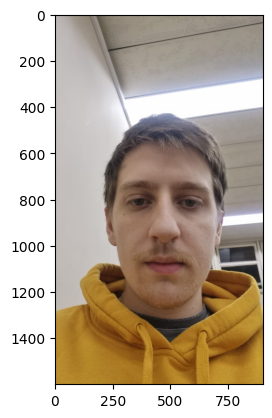

In [178]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to your image file
image_path = 'image.jpeg'

# Open the image file
img = Image.open(image_path)

# Display the image
plt.imshow(img)



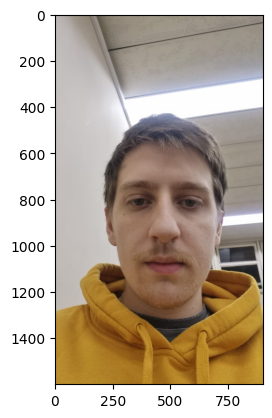

In [179]:
# img = image.resize((64, 64))
plt.imshow(img)


(1600, 900, 2)
<PIL.Image.Image image mode=LA size=900x1600 at 0x16BB177DD10>


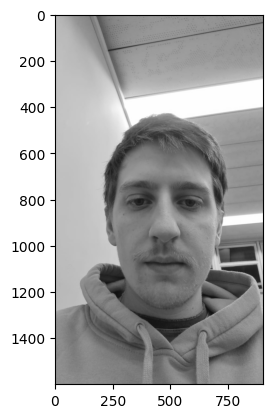

In [180]:
imggray = img.convert('LA')
print(np.shape(imggray))
print(imggray)

plt.imshow(imggray, cmap='gray');

(1440000,)
(1600, 900)


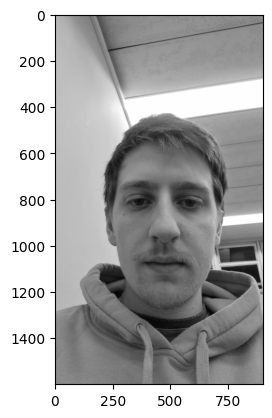

In [181]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
print(np.shape(imgmat))
# Reshape de acordo com as dimensões da imagem original
imgmat.shape = (imggray.size[1], imggray.size[0])
print(np.shape(imgmat))
# Plotando o resultado para mostrar que os dados não são alterados.
plt.imshow(imgmat, cmap='gray')
plt.show()

In [182]:
U, S, V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(S.shape)
print(V.shape)

(1600, 900)
(1600, 1600)
(900,)
(900, 900)


In [183]:
from sklearn.utils.extmath import randomized_svd
U, S, VT = randomized_svd(imgmat,
                              n_components=1,
                              n_iter=5,
                              random_state=None)

IndexError: index 5 is out of bounds for axis 0 with size 5

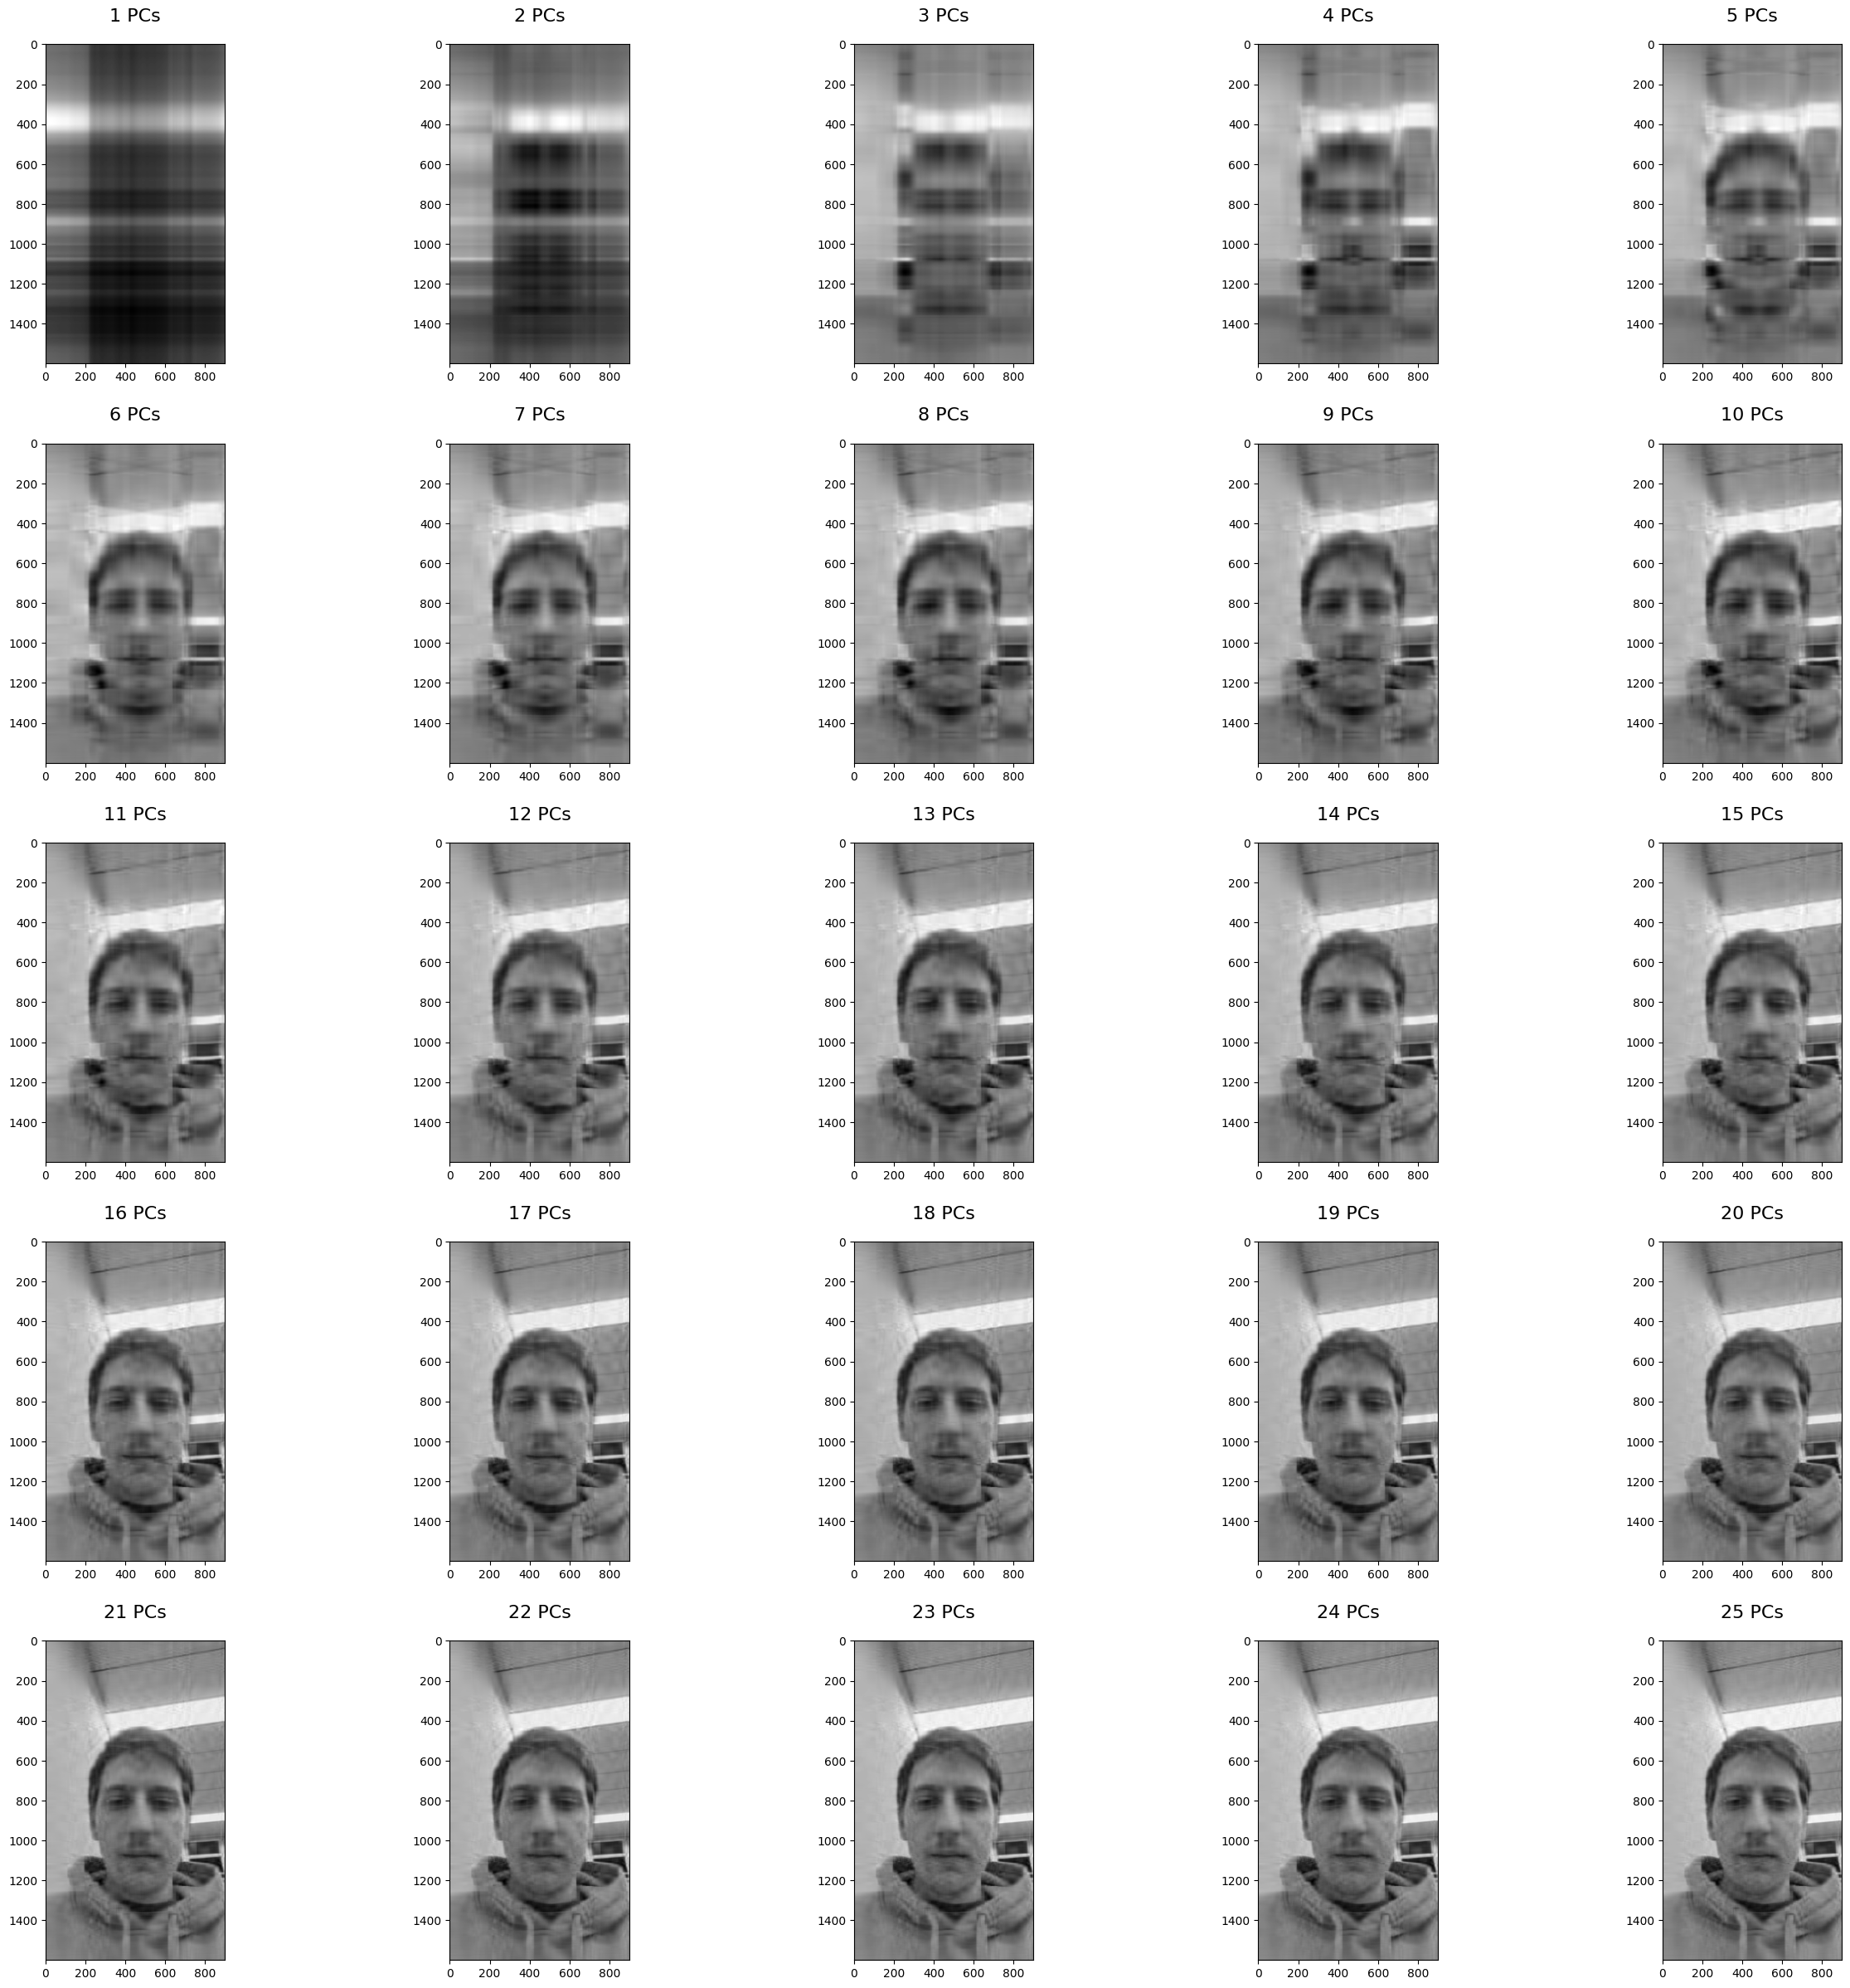

In [184]:
fig, axes = plt.subplots(5, 5, figsize=(30,30))
plt.subplots_adjust(wspace=0.3, hspace=0.25)

for i,j in enumerate(range(1, 101,1)):
    U, S, VT = randomized_svd(imgmat, n_components=j, n_iter=5,
                              random_state=None)
    reconstimg =   S* U @ VT

    axes[i // 5, i % 5].imshow(reconstimg, cmap='gray')
    axes[i // 5, i % 5].set_title("{0} PCs".format(j), y=1.05, fontsize=16)

plt.show()

# Conclusoes
Ao reduzir para 64x64 a imagem ficou muito ruim, entao fiz com o tamanha original, e ao observar acredito que 12ks esta bem aceitavel e reconhecivel